In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-watson-marketing-customer-value-data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv


### Load the packages

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Load the packages

In [3]:
df = pd.read_csv('../input/ibm-watson-marketing-customer-value-data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [4]:
df.head(3)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


### Analytics on Engaged Customers

**Overall Engagement Rate**

In [5]:
df.groupby('Response').count()['Customer']

Response
No     7826
Yes    1308
Name: Customer, dtype: int64

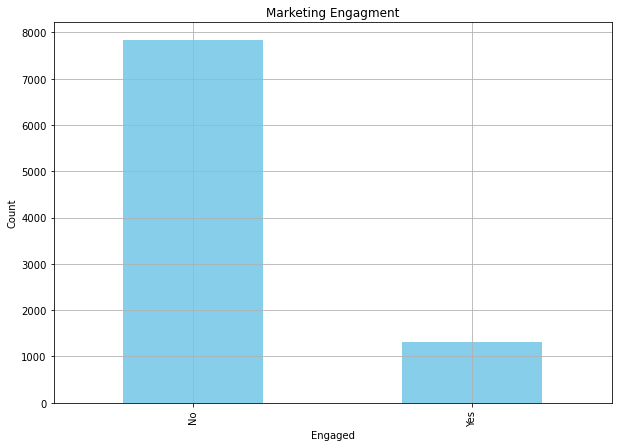

In [6]:
ax = df.groupby('Response').count()['Customer'].plot(
    kind='bar',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Marketing Engagment'
)

ax.set_xlabel('Engaged')
ax.set_ylabel('Count')

plt.show()

In [7]:
df.groupby('Response').count()['Customer']/df.shape[0]


Response
No     0.856799
Yes    0.143201
Name: Customer, dtype: float64

From these results, we can see that only about 14% of the customers responded to the marketing calls. 

**Engagement Rates by Offer Type**

In [8]:
by_offer_type_df = df.loc[
    df['Response'] == 'Yes'
].groupby([
    'Renew Offer Type'
]).count()['Customer']/df.groupby('Renew Offer Type').count()['Customer']

by_offer_type_df

Renew Offer Type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4         NaN
Name: Customer, dtype: float64

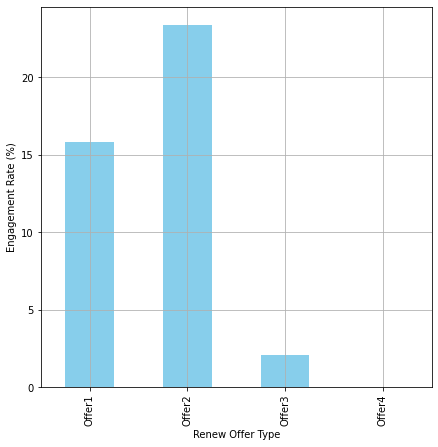

In [9]:
ax = (by_offer_type_df*100.0).plot(
    kind='bar',
    figsize=(7, 7),
    color='skyblue',
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')

plt.show()

As you can easily notice from this plot, Offer2 had the highest engagement rate among the customers.

**Offer Type & Vehicle Class**

In [10]:
by_offer_type_df = df.loc[
    df['Response'] == 'Yes'
].groupby([
    'Renew Offer Type', 'Vehicle Class'
]).count()['Customer']/df.groupby('Renew Offer Type').count()['Customer']

by_offer_type_df

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car    0.070362
                  Luxury Car       0.001599
                  Luxury SUV       0.004797
                  SUV              0.044776
                  Sports Car       0.011194
                  Two-Door Car     0.025586
Offer2            Four-Door Car    0.114833
                  Luxury Car       0.002051
                  Luxury SUV       0.004101
                  SUV              0.041012
                  Sports Car       0.016405
                  Two-Door Car     0.055366
Offer3            Four-Door Car    0.016760
                  Two-Door Car     0.004190
Name: Customer, dtype: float64

In [11]:
by_offer_type_df = by_offer_type_df.unstack().fillna(0)
by_offer_type_df

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,0.070362,0.001599,0.004797,0.044776,0.011194,0.025586
Offer2,0.114833,0.002051,0.004101,0.041012,0.016405,0.055366
Offer3,0.016760,0.000000,0.000000,0.000000,0.000000,0.004190


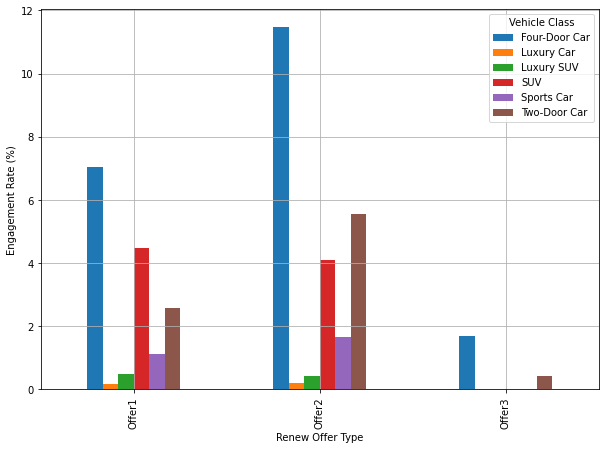

In [12]:

ax = (by_offer_type_df*100.0).plot(
    kind='bar',
    figsize=(10, 7),
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')

plt.show()

**Engagement Rates by Sales Channel**

In [13]:
by_sales_channel_df = df.loc[
    df['Response'] == 'Yes'
].groupby([
    'Sales Channel'
]).count()['Customer']/df.groupby('Sales Channel').count()['Customer']

by_sales_channel_df

Sales Channel
Agent          0.191544
Branch         0.114531
Call Center    0.108782
Web            0.117736
Name: Customer, dtype: float64

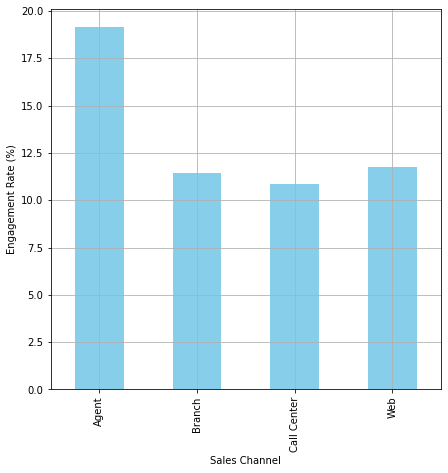

In [14]:
ax = (by_sales_channel_df*100.0).plot(
    kind='bar',
    figsize=(7, 7),
    color='skyblue',
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')

plt.show()

**Sales Channel & Vehicle Size**

In [15]:
by_sales_channel_df = df.loc[
    df['Response'] == 'Yes'
].groupby([
    'Sales Channel', 'Vehicle Size'
]).count()['Customer']/df.groupby('Sales Channel').count()['Customer']

by_sales_channel_df

Sales Channel  Vehicle Size
Agent          Large           0.020708
               Medsize         0.144953
               Small           0.025884
Branch         Large           0.021036
               Medsize         0.074795
               Small           0.018699
Call Center    Large           0.013598
               Medsize         0.067989
               Small           0.027195
Web            Large           0.013585
               Medsize         0.095094
               Small           0.009057
Name: Customer, dtype: float64

In [16]:
by_sales_channel_df = by_sales_channel_df.unstack().fillna(0)
by_sales_channel_df

Vehicle Size,Large,Medsize,Small
Sales Channel,,,
Agent,0.020708,0.144953,0.025884
Branch,0.021036,0.074795,0.018699
Call Center,0.013598,0.067989,0.027195
Web,0.013585,0.095094,0.009057


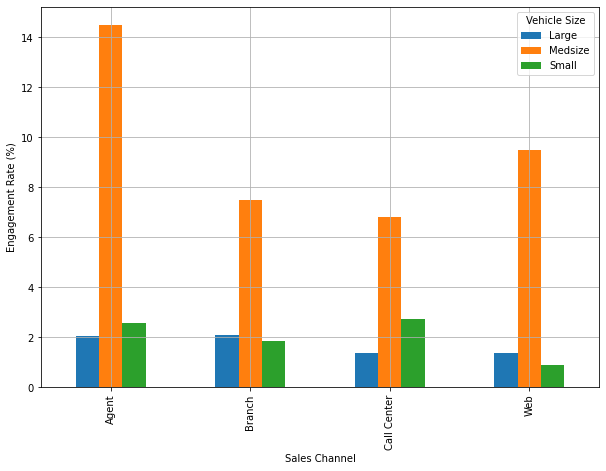

In [17]:
ax = (by_sales_channel_df*100.0).plot(
    kind='bar',
    figsize=(10, 7),
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')

plt.show()

**Engagement Rates by Months Since Policy Inception**

In [18]:
by_months_since_inception_df = df.loc[
    df['Response'] == 'Yes'
].groupby(
    by='Months Since Policy Inception'
)['Response'].count() / df.groupby(
    by='Months Since Policy Inception'
)['Response'].count() * 100.0

by_months_since_inception_df.fillna(0)

Months Since Policy Inception
0     14.457831
1     14.117647
2     20.224719
3     26.315789
4     19.780220
        ...    
95    15.584416
96    17.910448
97     0.000000
98     0.000000
99     7.692308
Name: Response, Length: 100, dtype: float64

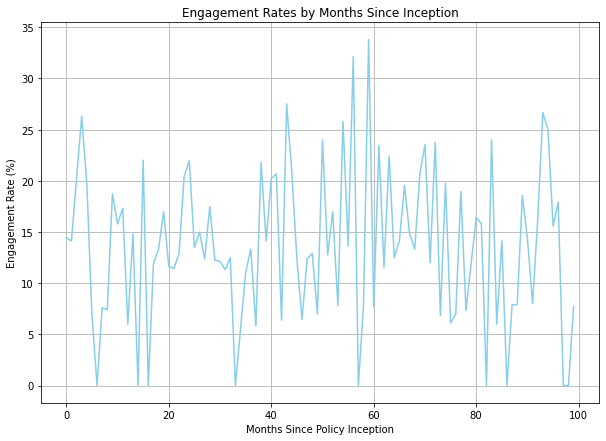

In [19]:
ax = by_months_since_inception_df.fillna(0).plot(
    figsize=(10, 7),
    title='Engagement Rates by Months Since Inception',
    grid=True,
    color='skyblue'
)

ax.set_xlabel('Months Since Policy Inception')
ax.set_ylabel('Engagement Rate (%)')

plt.show()

### Customer Segmentation by CLV & Months Since Policy Inception

In [20]:
df['Customer Lifetime Value'].describe()


count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

In [21]:

df['CLV Segment'] = df['Customer Lifetime Value'].apply(
    lambda x: 'High' if x > df['Customer Lifetime Value'].median() else 'Low'
)

In [22]:
df['Months Since Policy Inception'].describe()

count    9134.000000
mean       48.064594
std        27.905991
min         0.000000
25%        24.000000
50%        48.000000
75%        71.000000
max        99.000000
Name: Months Since Policy Inception, dtype: float64

In [23]:
df['Policy Age Segment'] = df['Months Since Policy Inception'].apply(
    lambda x: 'High' if x > df['Months Since Policy Inception'].median() else 'Low'
)

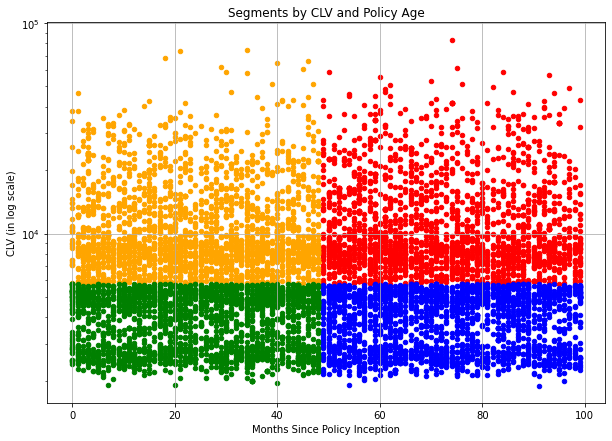

In [24]:
ax = df.loc[
    (df['CLV Segment'] == 'High') & (df['Policy Age Segment'] == 'High')
].plot.scatter(
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True,
    color='red'
)

df.loc[
    (df['CLV Segment'] == 'Low') & (df['Policy Age Segment'] == 'High')
].plot.scatter(
    ax=ax,
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True,
    color='blue'
)

df.loc[
    (df['CLV Segment'] == 'High') & (df['Policy Age Segment'] == 'Low')
].plot.scatter(
    ax=ax,
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True,
    color='orange'
)

df.loc[
    (df['CLV Segment'] == 'Low') & (df['Policy Age Segment'] == 'Low')
].plot.scatter(
    ax=ax,
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True,
    color='green',
    grid=True,
    figsize=(10, 7)
)

ax.set_ylabel('CLV (in log scale)')
ax.set_xlabel('Months Since Policy Inception')

ax.set_title('Segments by CLV and Policy Age')

plt.show()


As you can see from this scatter plot, the data points in red represent those customers in the High CLV and High Policy Age segment. Those in orange represent the High CLV and Low Policy Age group, those in blue represent the Low CLV and High Policy Age group, and lastly, those in green represent the Low CLV and Low Policy Age group.

In [25]:
engagment_rates_by_segment_df = df.loc[
    df['Response'] == 'Yes'
].groupby(
    ['CLV Segment', 'Policy Age Segment']
).count()['Customer']/df.groupby(
    ['CLV Segment', 'Policy Age Segment']
).count()['Customer']

engagment_rates_by_segment_df

CLV Segment  Policy Age Segment
High         High                  0.138728
             Low                   0.132067
Low          High                  0.162450
             Low                   0.139957
Name: Customer, dtype: float64

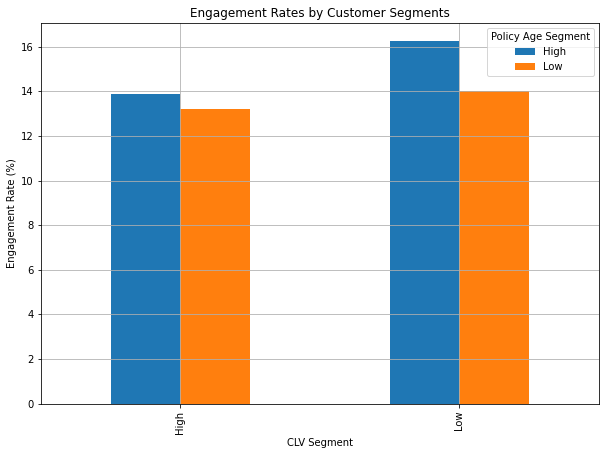

In [26]:
ax = (engagment_rates_by_segment_df.unstack()*100.0).plot(
    kind='bar',
    figsize=(10, 7),
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')
ax.set_title('Engagement Rates by Customer Segments')

plt.show()

High Policy Age Segment has higher engagement than the Low Policy Age Segment. This suggests that those customers who have been insured by this company longer respond better. It is also noticeable that the High Policy Age and Low CLV segment has the highest engagement rate among the four segments.